In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline

pylab.rcParams['figure.figsize'] = (22.0, 11.0)

## Header information for a typical site

- Year
- Month
- Day
- DOY
- Decimal_year
- W_Year
- WYD
- Decimal_WYear
- qkde10_Temp(avg)
- max
- min
- qkuc10_Temp(avg)
- max .1
- min.1
- open10_Temp(avg)
- max .2
- min.2
- acde10_Temp(avg)
- max .3
- min.3
- acuc10_Temp(avg)
- max .4
- min.4
- qkde30_Temp(avg)
- max .5
- min.5
- qkuc30_Temp(avg)
- max .6
- min.6
- open30_Temp(avg)
- max .7
- min.7
- acde30_Temp(avg)
- max .8
- min.8
- acuc30_Temp(avg)
- max .9
- min.9
- qkde60_Temp(avg)
- max .10
- min.10
- qkuc60_Temp(avg)
- max .11
- min.11
- open60_Temp(avg)
- max .12
- min.12
- acde60_Temp(avg)
- max .13
- min.13
- acuc60_Temp(avg)
- max .14
- min.14
- qkuc90_Temp(avg)
- max .15
- min.15
- depth_qkde(cm)
- Max
- Min
- depth_qkuc(cm)
- Max .1
- Min.1
- depth_acde(cm)
- Max .2
- Min.2
- depth_acuc(cm)
- Max .3
- Min.3
- depth_open(cm)
- Max .4
- Min.4
- Air_temp_qkde (deg C)
- Max
- Min
- Air_temp_qkuc (deg C)
- Max.1
- Min .1
- Air_temp_acde (deg C)
- Max.2
- Min .2
- Air_temp_acuc (deg C)
- Max.3
- Min .3
- Air_temp_open (deg C)
- Max.4
- Min .4


In [2]:
wyears = range(2008,2013)

## Upper First

In [3]:
data=pd.DataFrame()
for wy in wyears:
    files = glob.glob('./snow_depth/WY_'+str(wy)+'_Up*')
    for fl in files:
        tmp = pd.read_csv(fl)
        tmp.index = pd.DatetimeIndex(tmp.date_time) # append index
        tmp = tmp.filter(regex='cm') # pull out depths variables
        
        data = pd.concat([data,tmp])
data[data == -999] = np.NaN
data = data.sort_index()
data = data.resample('D', how=mean)
data2 = data.mean(axis=1)

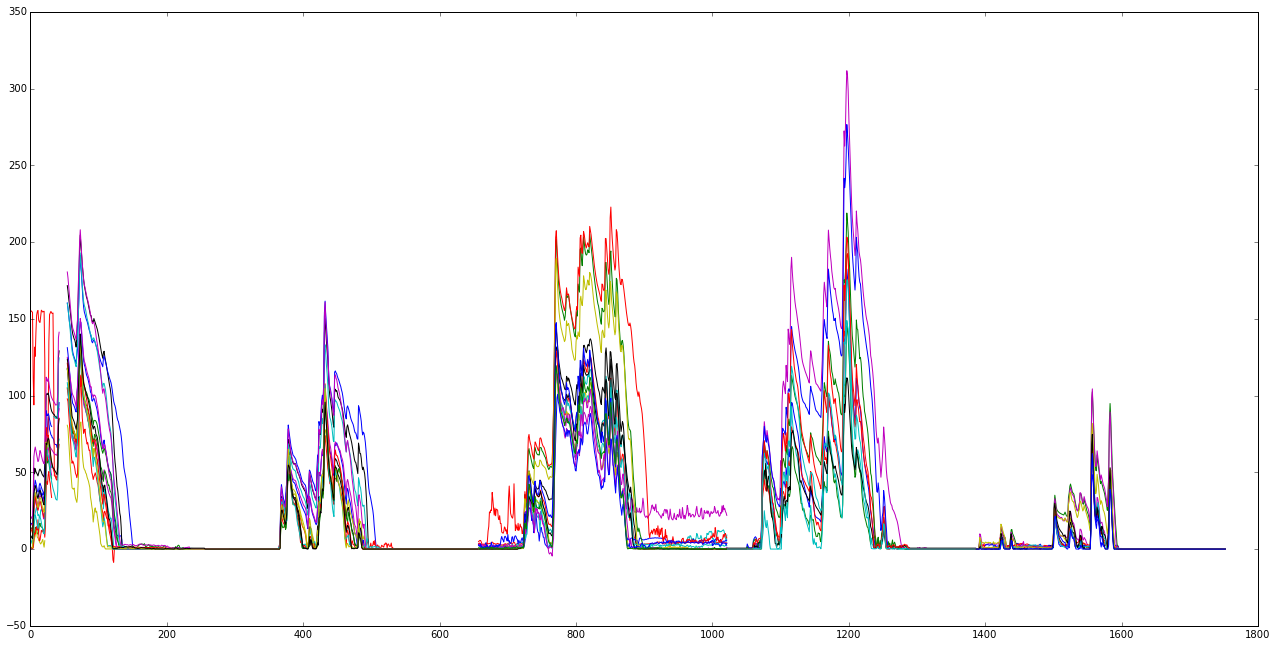

In [4]:
plt.plot(data);

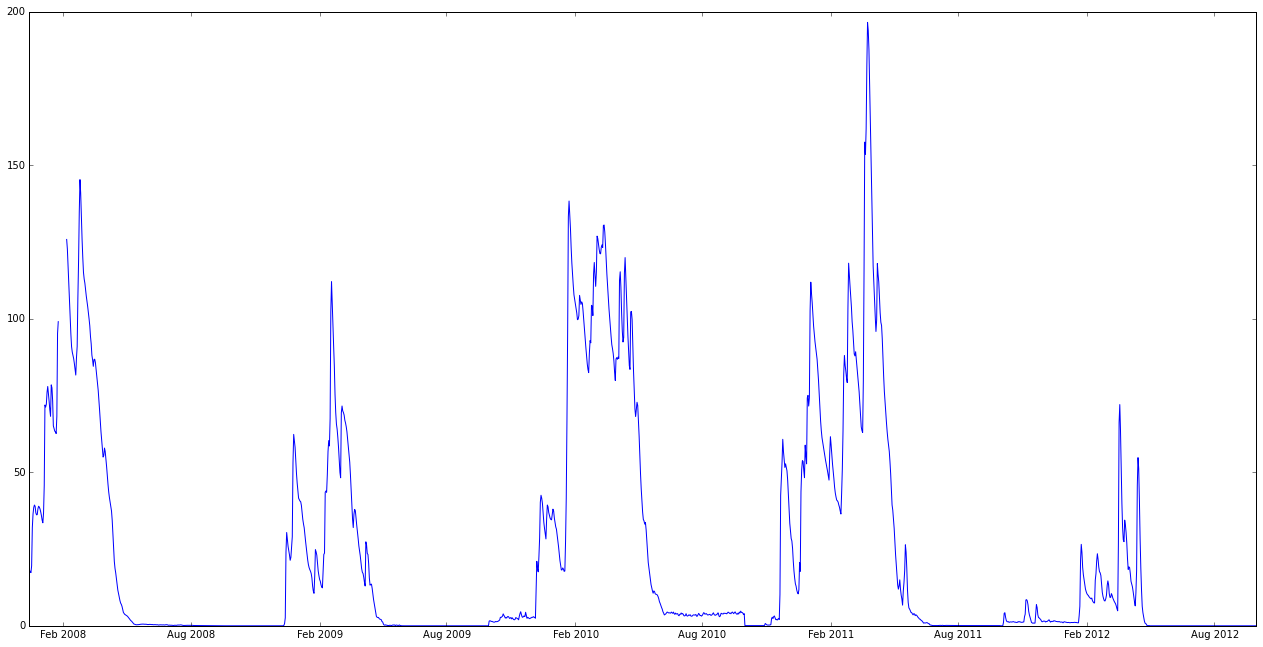

In [5]:
plt.plot(data2.index,data2)

In [6]:
data2.to_pickle('./snow_depth/upper_wy2008-2012_ave.pcl')

In [7]:
data.to_pickle('./snow_depth/upper_wy2008-2012_all.pcl')

## Now the Lower Site

In [8]:
data=pd.DataFrame()
for wy in wyears:
    files = glob.glob('./snow_depth/WY_'+str(wy)+'_L*')
    for fl in files:
        tmp = pd.read_csv(fl)
        tmp.index = pd.DatetimeIndex(tmp.date_time) # append index
        tmp = tmp.filter(regex='cm') # pull out depths variables
        
        data = pd.concat([data,tmp])
data[data == -999] = np.NaN
data = data.sort_index()
data = data.resample('D', how=mean)
data2 = data.mean(axis=1)

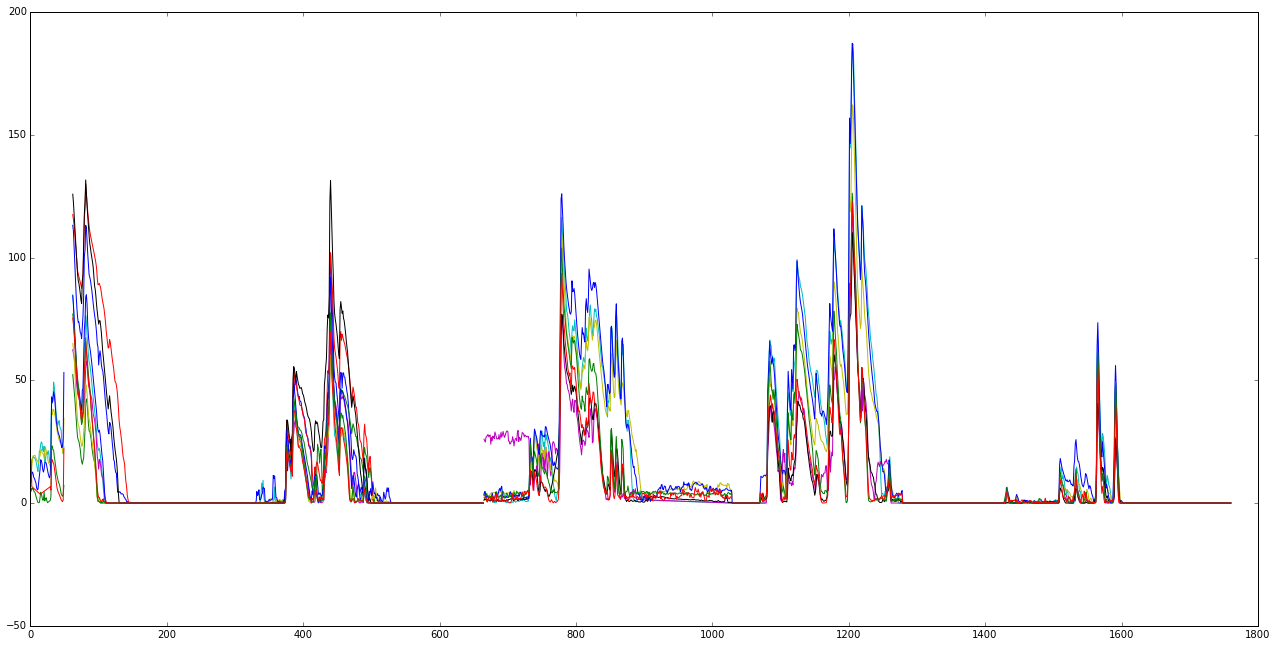

In [9]:
plt.plot(data);

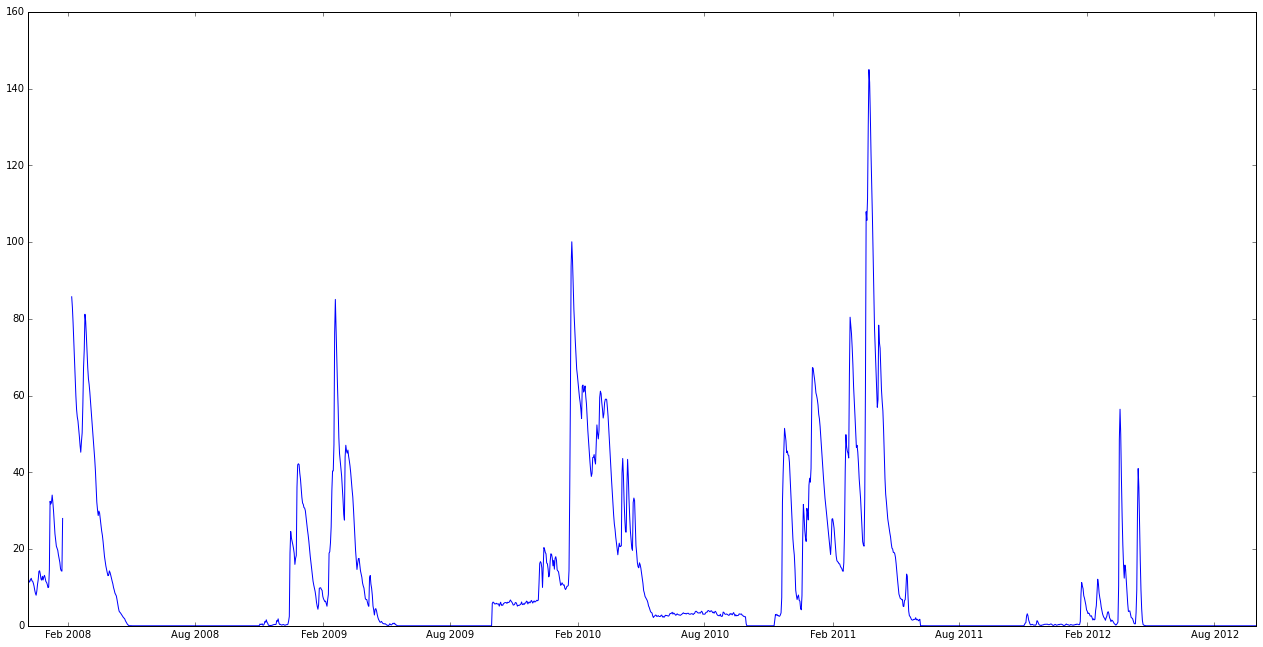

In [10]:
plt.plot(data2.index,data2);

In [11]:
data2.to_pickle('./snow_depth/lower_wy2008-2012_ave.pcl')
data.to_pickle('./snow_depth/lower_wy2008-2012_all.pcl')